In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
train_path = '/content/drive/MyDrive/Docs/archive/train.csv'
df = pd.read_csv(train_path)

In [ ]:

# Step 1: Drop irrelevant columns
df.drop(columns=['Customer ID', 'Name', 'Property ID'], inplace=True)


MAE: 21799.224445462914
MSE: 1076701697.7600782
R² Score: 0.531982511846756


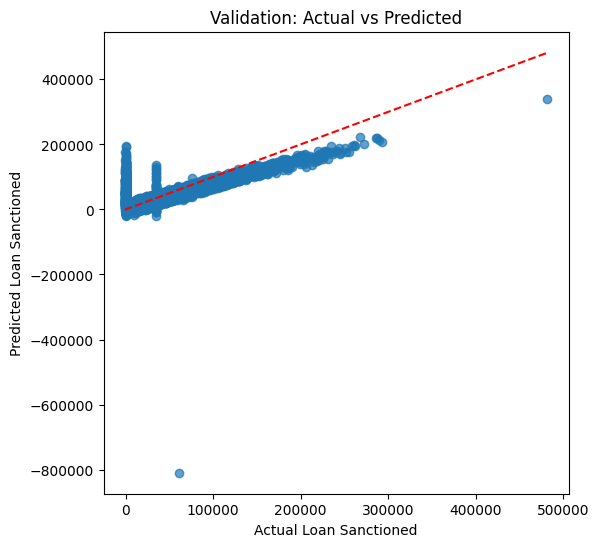

In [ ]:
# Step 2: Handle missing values (simple strategy: fill with mode for categorical, median for numeric)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Step 3: Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Feature / Target split
target = 'Loan Sanction Amount (USD)'
X = df.drop(columns=[target])
y = df[target]

# Step 5: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 8: Evaluate
y_pred = lr.predict(X_val)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("MSE:", mean_squared_error(y_val, y_pred))
print("R² Score:", r2_score(y_val, y_pred))

# Step 9: Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.7)
plt.xlabel("Actual Loan Sanctioned")
plt.ylabel("Predicted Loan Sanctioned")
plt.title("Validation: Actual vs Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()



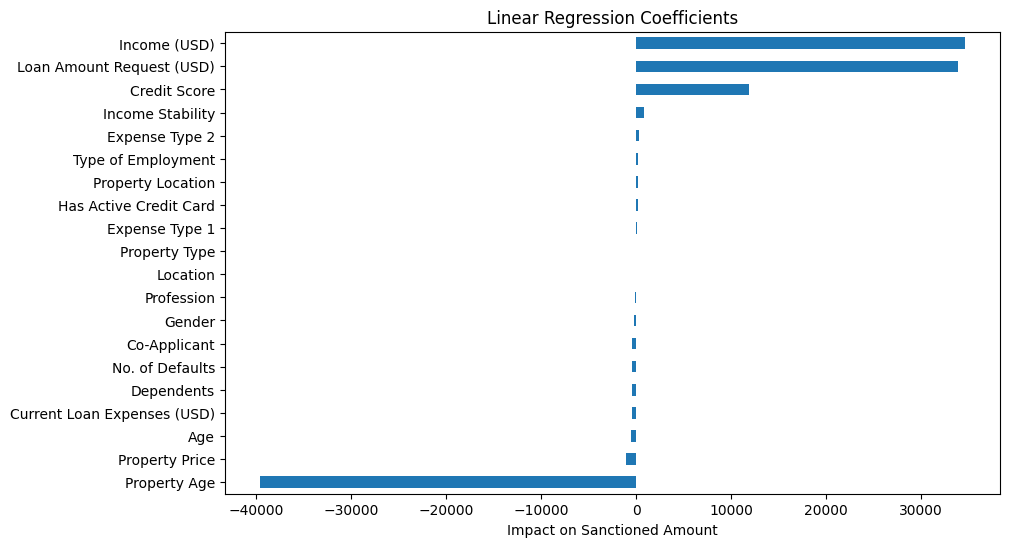

In [ ]:

# Feature importance
coef = pd.Series(lr.coef_, index=X.columns)
coef.sort_values().plot(kind='barh', figsize=(10,6), title="Linear Regression Coefficients")
plt.xlabel("Impact on Sanctioned Amount")
plt.show()


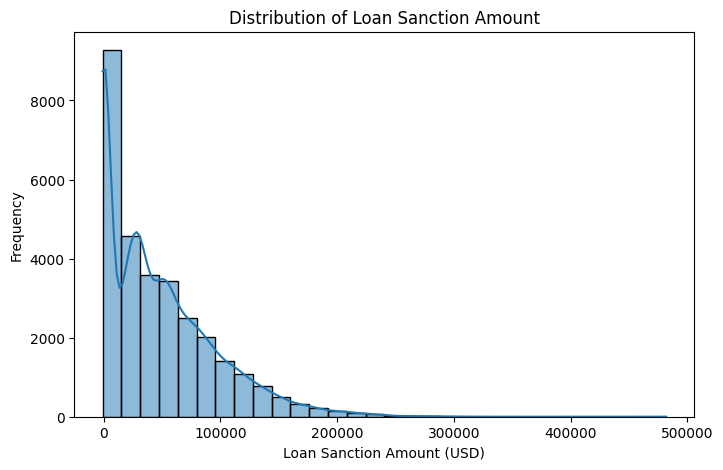

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Property Age', 'Property Type',
       'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')


<Figure size 800x500 with 0 Axes>

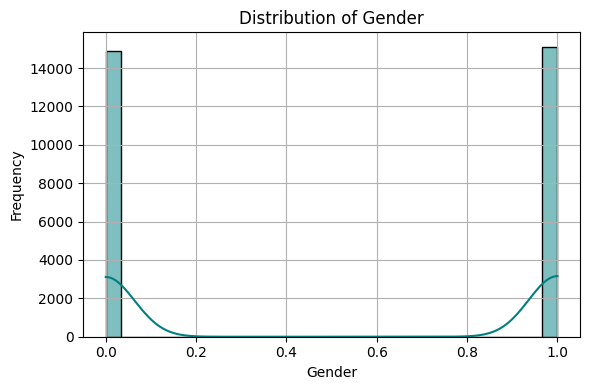

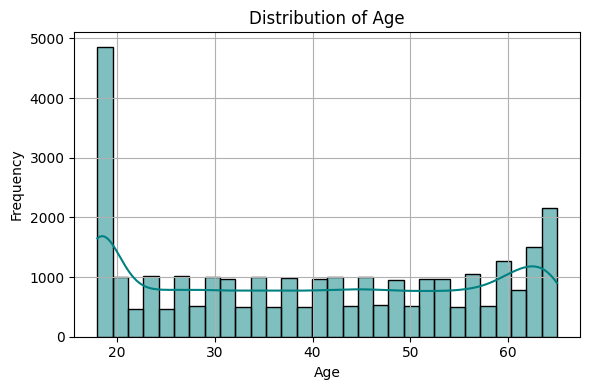

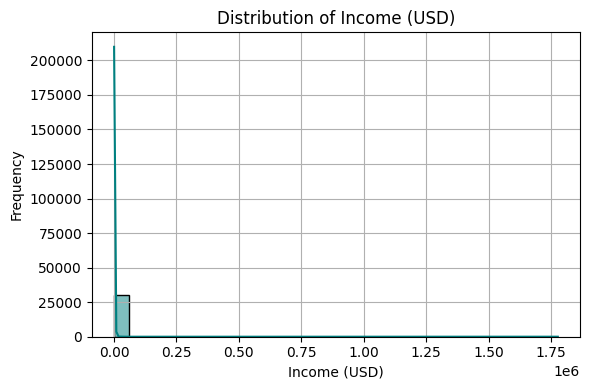

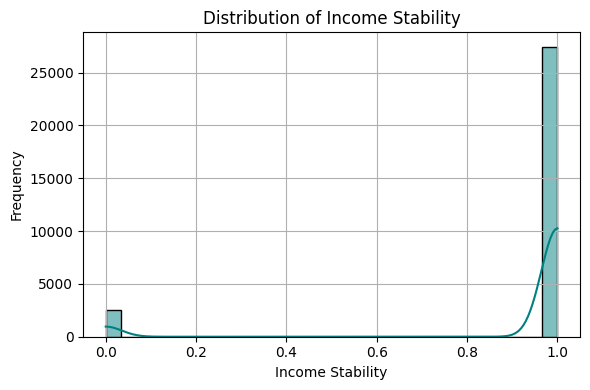

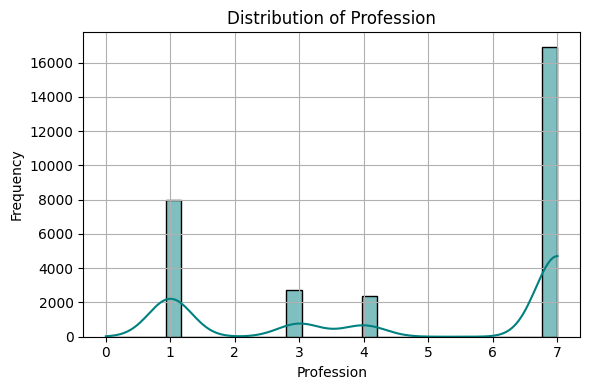

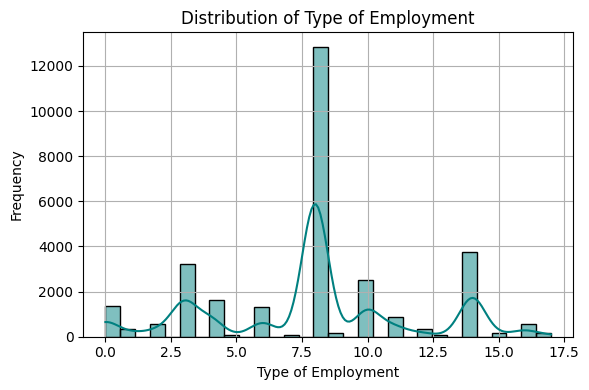

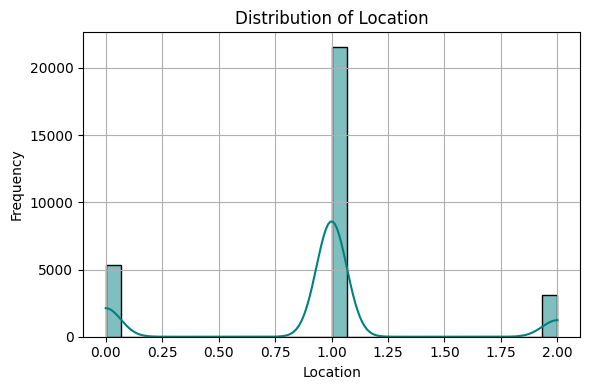

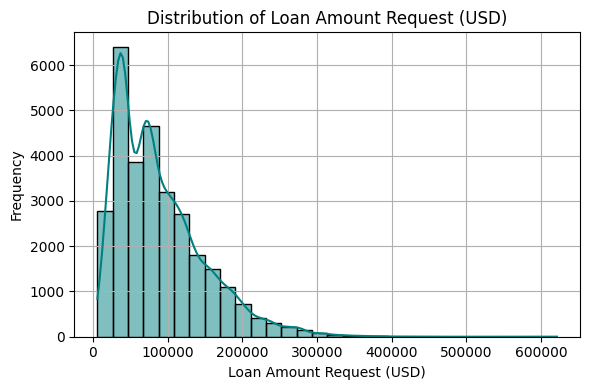

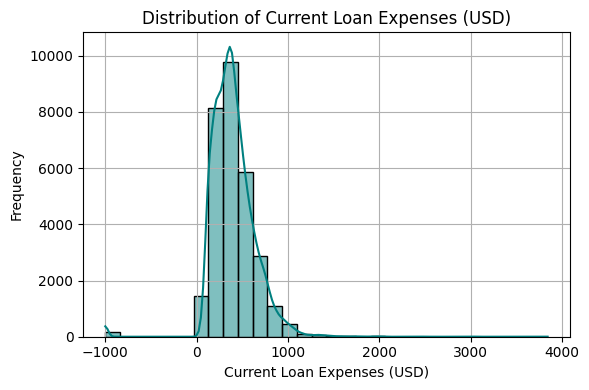

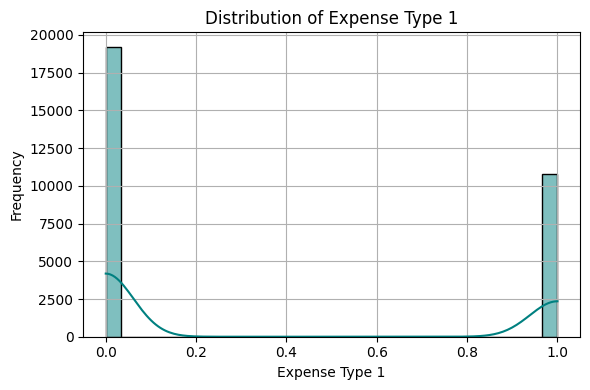

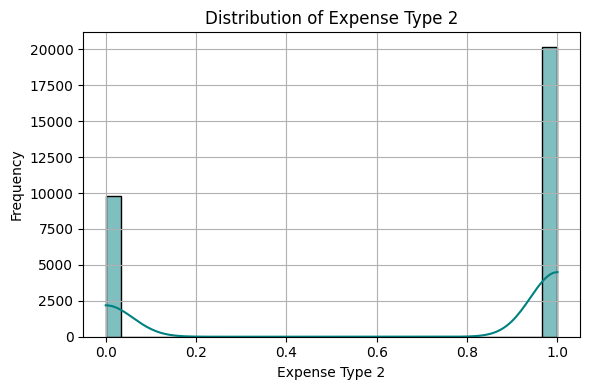

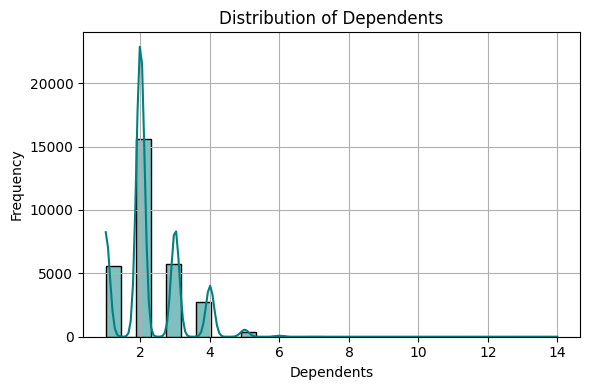

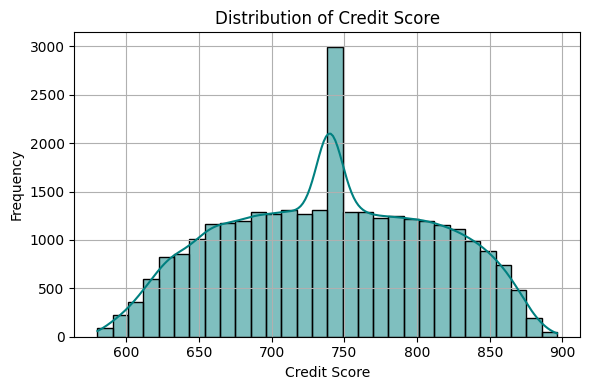

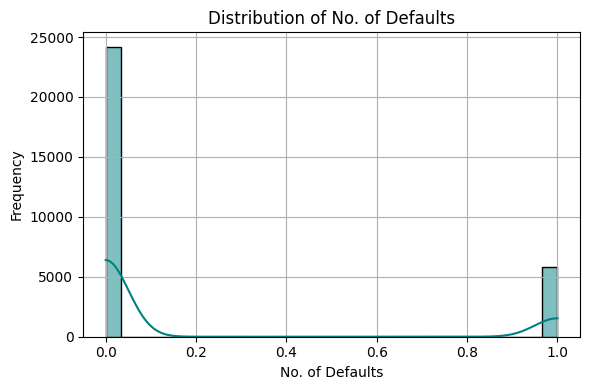

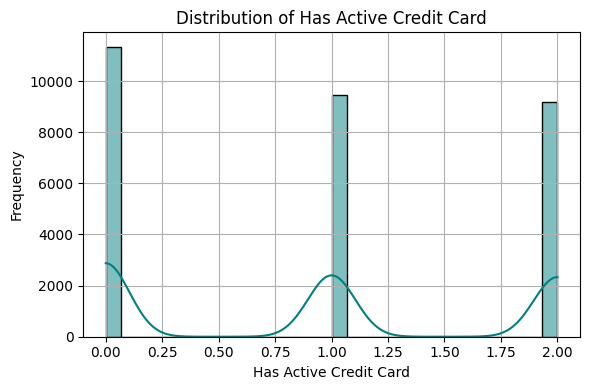

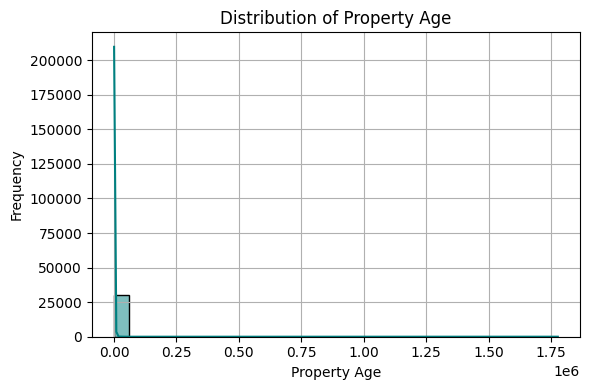

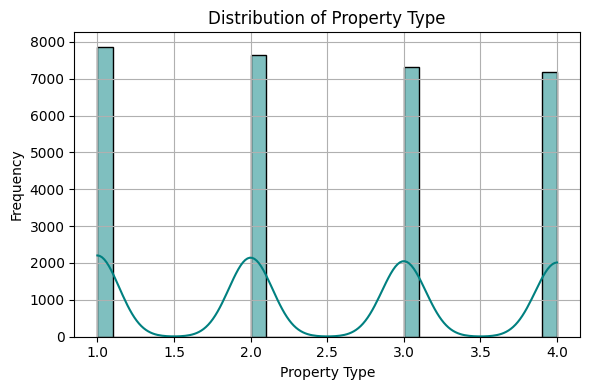

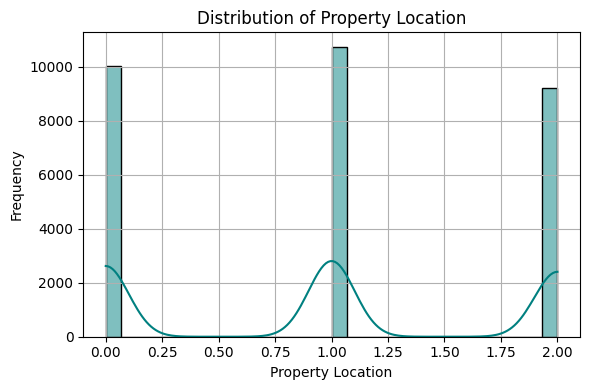

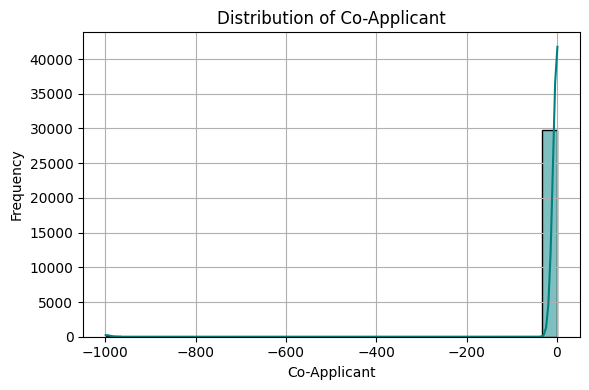

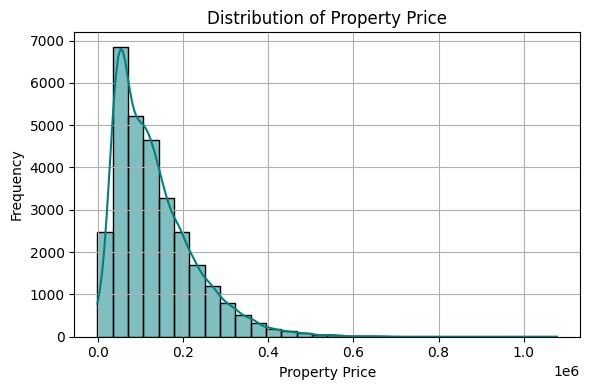

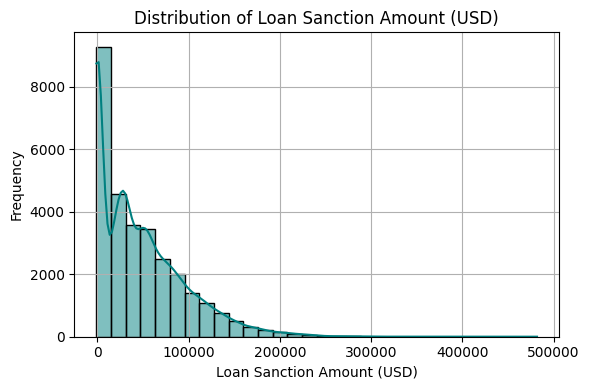

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Loan Sanction Amount
plt.figure(figsize=(8, 5))
sns.histplot(df['Loan Sanction Amount (USD)'], kde=True, bins=30)
plt.title('Distribution of Loan Sanction Amount')
plt.xlabel('Loan Sanction Amount (USD)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 5))

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



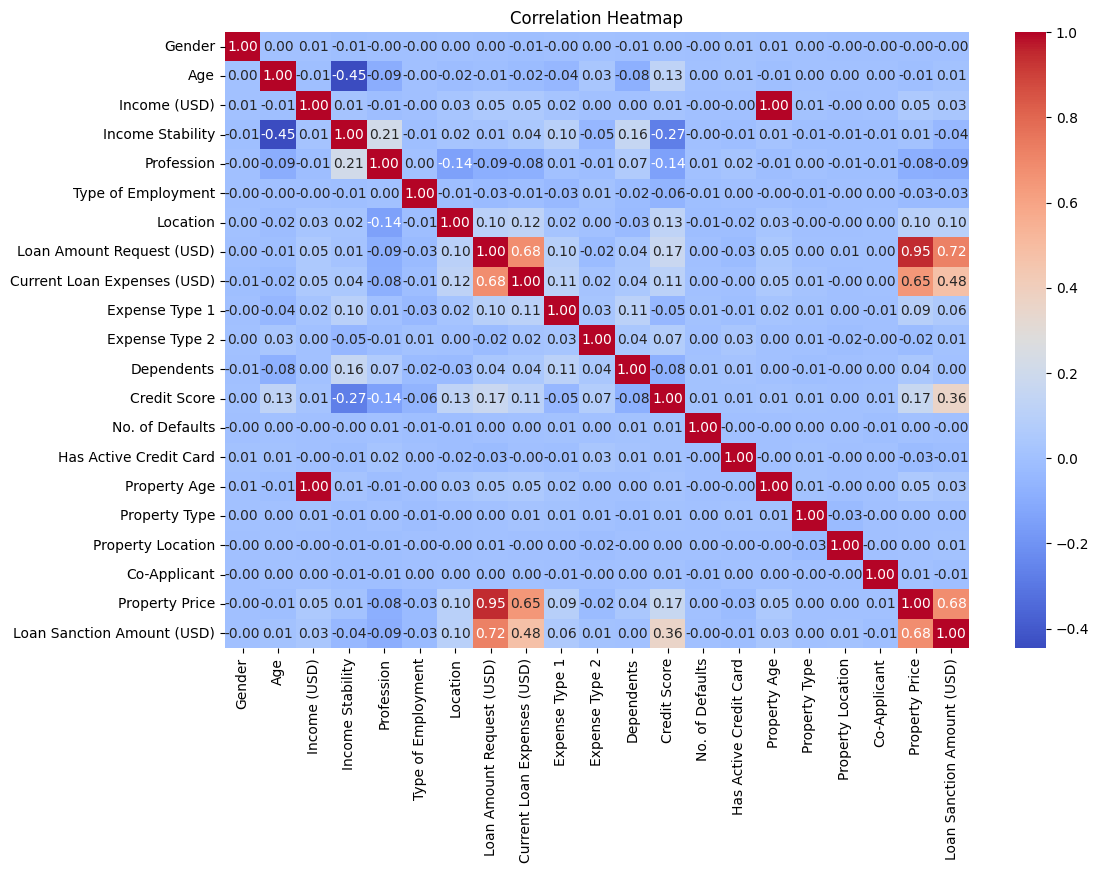

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


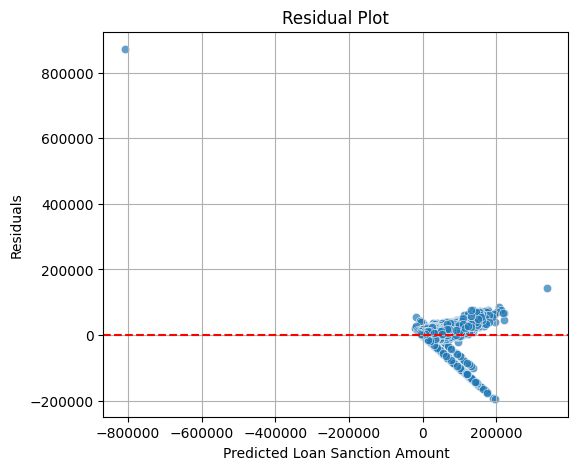

In [ ]:
residuals = y_val - y_pred
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Loan Sanction Amount')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


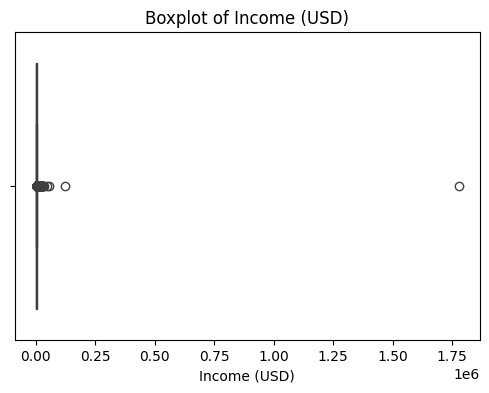

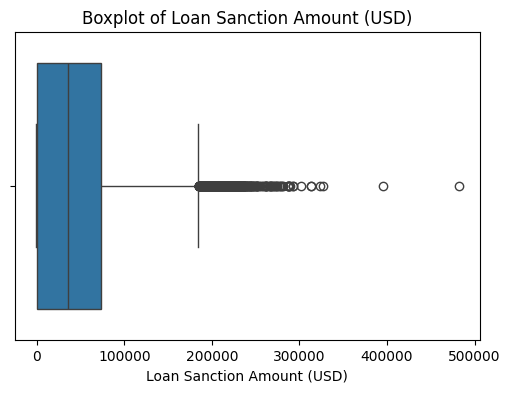

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Income (USD)'])
plt.title('Boxplot of Income (USD)')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Loan Sanction Amount (USD)'])
plt.title('Boxplot of Loan Sanction Amount (USD)')
plt.show()


In [ ]:
n = X_val.shape[0]  # number of validation samples
p = X_val.shape[1]  # number of features
r2 = r2_score(y_val, y_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R²:", adjusted_r2)


Adjusted R²: 0.5304169741710469


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
r2_scores = []

for train_idx, test_idx in kf.split(X_scaled):
    X_tr, X_te = X_scaled[train_idx], X_scaled[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]
    model = LinearRegression()
    model.fit(X_tr, y_tr)
    y_pred_kf = model.predict(X_te)

    mae_scores.append(mean_absolute_error(y_te, y_pred_kf))
    mse_scores.append(mean_squared_error(y_te, y_pred_kf))
    r2_scores.append(r2_score(y_te, y_pred_kf))

print("K-Fold Cross Validation Results (5 Folds):")
for i in range(5):
    print(f"Fold {i+1}: MAE={mae_scores[i]:.2f}, MSE={mse_scores[i]:.2f}, RMSE={np.sqrt(mse_scores[i]):.2f}, R²={r2_scores[i]:.4f}")

print("Average:")
print(f"MAE={np.mean(mae_scores):.2f}, MSE={np.mean(mse_scores):.2f}, RMSE={np.sqrt(np.mean(mse_scores)):.2f}, R²={np.mean(r2_scores):.4f}")


K-Fold Cross Validation Results (5 Folds):
Fold 1: MAE=21799.22, MSE=1076701697.76, RMSE=32813.13, R²=0.5320
Fold 2: MAE=21927.37, MSE=982547266.65, RMSE=31345.61, R²=0.5678
Fold 3: MAE=22414.60, MSE=1066252447.36, RMSE=32653.52, R²=0.5397
Fold 4: MAE=21833.54, MSE=995734912.54, RMSE=31555.27, R²=0.5768
Fold 5: MAE=21024.88, MSE=881939443.57, RMSE=29697.47, R²=0.6097
Average:
MAE=21799.92, MSE=1000635153.57, RMSE=31632.82, R²=0.5652


In [ ]:
!pip install nbconvert


In [34]:

!jupyter nbconvert --to latex /content/drive/MyDrive/Colab_Notebooks/ML_Assignment2.ipynb


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/ML_Assignment2.ipynb to latex
[NbConvertApp] Support files will be in ML_Assignment2_files/
[NbConvertApp] Making directory /content/drive/MyDrive/Colab_Notebooks/ML_Assignment2_files
[NbConvertApp] Writing 51693 bytes to /content/drive/MyDrive/Colab_Notebooks/ML_Assignment2.tex
